# Deep Learning & Computer Vision - Project 1

Welcome to your first project, in this project you should create a statistical model which can predict the character in a 32x32 image, you will have 26 groups, one for each character.

Notice that these images are generated from a group of fonts using python.

## Importing data

You will have 6000 images as a training set, and 1722 images as a testing set.
The labels of the images are the ASCII code for the characters, note that the characters are capital letters `A` to `Z`.

In [89]:
import numpy as np
import matplotlib as mpl   
import matplotlib.pyplot as plt
from matplotlib import image 

In [90]:
training_images = np.load('training_images.npy')
training_labels = np.load('training_labels.npy')
testing_images = np.load('test_images.npy')
testing_labels = np.load('test_labels.npy')

print ("Training Images Shape: " + str(training_images.shape))
print ("Training Labels Shape: " + str(training_labels.shape))
print ("Testing  Images Shape: " + str(testing_images.shape))
print ("Testing  Labels Shape: " + str(testing_labels.shape))

Training Images Shape: (6000, 32, 32)
Training Labels Shape: (6000,)
Testing  Images Shape: (1722, 32, 32)
Testing  Labels Shape: (1722,)


## Splitting data to groups
In this section, you should split your data into groups of categories (e.g all `A` images in one array)

In [91]:
def get_char_images (ascii_code):
  return training_images[training_labels[:]== ascii_code]    
#return array from training images where training labels = ascii code

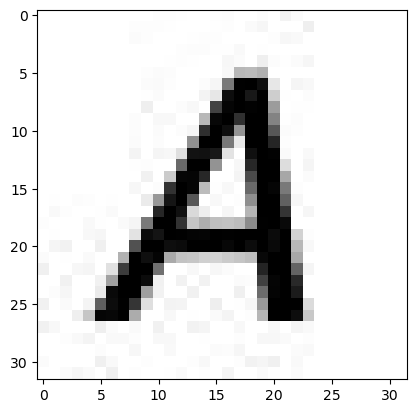

In [92]:
A_images = get_char_images(ord("A"))
plt.imshow(A_images[1], cmap='gray_r')
plt.show()

## Prepare your data for prediction
In this section, you could whatever you want to teach your model, you could simpy get the mean of a character, then use this data in the future for predicting new image.

In [93]:
def get_char_mean (char):
     return  get_char_images(char).mean(axis=0)    

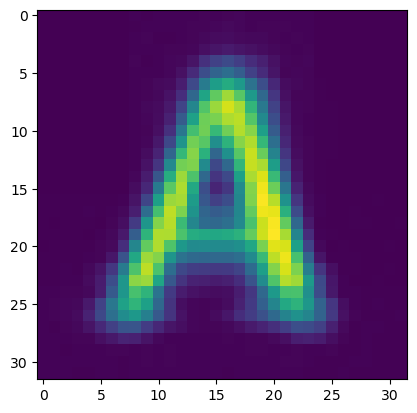

In [94]:
A_mean = get_char_mean(ord("A")) #ord A means ascii code for A
plt.imshow(A_mean)
plt.show()
#This image is the mean for A 

In [95]:
import string
char_means = []
for i in range(26):
    char_means.append(get_char_mean(ord("A") + i))

(26, 32, 32)


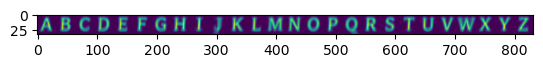

In [96]:
numbers_means = np.empty((26, 32, 32))
for i in range(26):
    numbers_means[i] = get_char_mean(ord('A') + i)
means = np.concatenate(numbers_means, axis=1)
print(numbers_means.shape)
plt.imshow(means)
plt.show()
#the means for all characters in one image 

## Predict the character of an image
In this section, you should write the prediction function, which takes an image and return the ASCII code of the predicted character.

In [97]:
def predict (test_image):
    test_char_prediction_mse= ((numbers_means[:] - test_image) ** 2).mean(axis=(1,2)) #array to calculate the mse 
    #in related to each mean for each char
    return np.argmin(test_char_prediction_mse) + 65 #get the index of the smallest mse which mean it's the test image 
#then add 65 to get the ascii code
    

In [98]:
predicted_labels = np.empty(testing_labels.shape, dtype=testing_labels.dtype)
for i in range(len(predicted_labels)):
    predicted_labels[i] = predict(testing_images[i])

## Evaluate your model
In this section, you should print the accuracy of your model, and draw the confusion matrix of it.

In [99]:
accuracy = 0
correct_predictions = np.sum(predicted_labels == testing_labels)
accuracy = correct_predictions / len(predicted_labels)
print("Accuracy = "+str(accuracy*100) + "%")


Accuracy = 78.16492450638792%


#### Show your confusion matrix

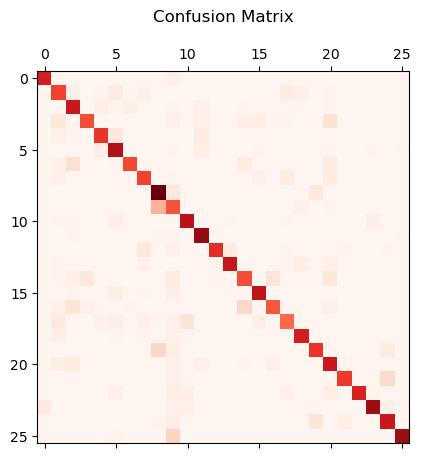

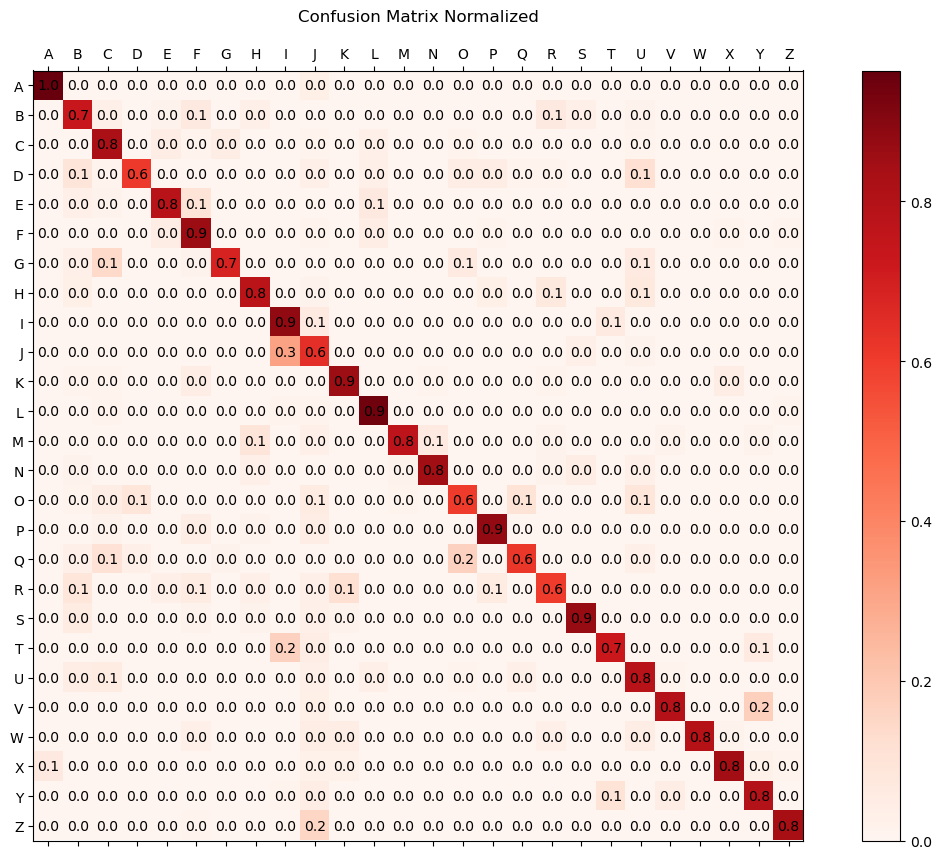

In [100]:
confusion = np.zeros(shape=(26, 26))
confusion_normilized = np.zeros(shape=(26, 26))
for true_label in range (26):
    for predicted_label in range(26):
        confusion[true_label, predicted_label] = np.sum (np.logical_and((predicted_labels) == (predicted_label + 65), testing_labels == (true_label+65)))
    confusion_normilized[true_label, :] = confusion[true_label, :] / np.sum(testing_labels == (true_label + 65))

plt.matshow(confusion, cmap='Reds')
plt.title("Confusion Matrix\n")
plt.show()


plt.figure(figsize=(15,10))
ax = plt.subplot()
ix = ax.matshow(confusion_normilized, cmap='Reds')
for (i, j), z in np.ndenumerate(confusion_normilized):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

alpha_labels = np.array([chr(code) for code in range(ord('A'), ord('Z')+1)])
plt.xticks(range(26), alpha_labels)
plt.yticks(range(26), alpha_labels)
plt.colorbar(ix)
plt.title("Confusion Matrix Normalized\n")
plt.show()

## Predict a full text!
In the following images, you will notice that the font has fixed-width = 32 pixels, so you could predict the text in this image.

Be aware that the space is not present in our dataset, you could modify your prediction function!

(32, 960)
30


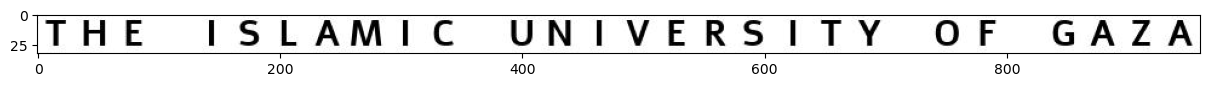

In [101]:
iug_test = image.imread('iug.jpg')[:,:,0]
print(iug_test.shape)
print(int(len(iug_test[1]) / len(iug_test)))
plt.figure(figsize=(15,5))
plt.imshow(iug_test, cmap='gray_r')
plt.show()

In [135]:
import pytesseract
import cv2
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
def predict_text (img):   
   #return pytesseract.image_to_string(img)  
   predicted_text = ''
   no_space= ''
   count = 0 
   for r in range(0,img.shape[0],32): #0 is rows direction, 32*32 pixels
        for c in range(0,img.shape[1],32): #for columns
            cv2.imwrite(f"img{r}_{c}.jpg",img[r:r+32, c:c+32]) #name the image by the row(always row0)and the column
            #the column will be increased by 32 as every character is 32*32, this image is saved locally in the folder
            #step is by 32 for both rows and columns to take one character each step as in the above figure
            imge='img'+str(r)+'_'+str(c)+'.jpg' #single character image (which is splitted), take it from the folder
            full_img = image.imread(imge)[:,:] #read the full image to predict its letter
            if np.mean(full_img) != 0: #so there is a character
                print(" Prediction: "+ str(predict(full_img))+" in ascii "+chr(predict(full_img))) #convert the predicted num to string to be printed
                predicted_text+=(chr(predict(full_img))) #the ascii for each character prediction
                no_space+=(chr(predict(full_img))) #the ascii for the prediction
                count= count +1 #to walk to next character
            else: 
                predicted_text+=" " #mean = 0 so we have a space, take in considration it in the predicted text
   print(f"the predicted text is {predicted_text}")
   print(f"the predict text without spaces is {no_space}")
   print("the original text is "+ pytesseract.image_to_string(img))
 

In [136]:
predict_text(iug_test)

 Prediction: 84 in ascii T
 Prediction: 72 in ascii H
 Prediction: 69 in ascii E
 Prediction: 73 in ascii I
 Prediction: 83 in ascii S
 Prediction: 76 in ascii L
 Prediction: 65 in ascii A
 Prediction: 77 in ascii M
 Prediction: 73 in ascii I
 Prediction: 67 in ascii C
 Prediction: 85 in ascii U
 Prediction: 78 in ascii N
 Prediction: 73 in ascii I
 Prediction: 86 in ascii V
 Prediction: 69 in ascii E
 Prediction: 82 in ascii R
 Prediction: 83 in ascii S
 Prediction: 73 in ascii I
 Prediction: 84 in ascii T
 Prediction: 89 in ascii Y
 Prediction: 79 in ascii O
 Prediction: 70 in ascii F
 Prediction: 71 in ascii G
 Prediction: 65 in ascii A
 Prediction: 90 in ascii Z
 Prediction: 65 in ascii A
the predicted text is THE ISLAMIC UNIVERSITY OF GAZA
the predict text without spaces is THEISLAMICUNIVERSITYOFGAZA
the original text is THE ISLAMIC UNIVERSITY OF GAZA



### Now try it with a diffrent font

(32, 992)


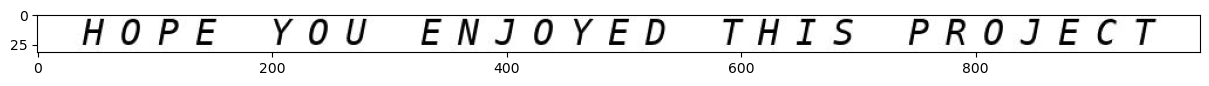

 Prediction: 72 in ascii H
 Prediction: 68 in ascii D
 Prediction: 80 in ascii P
 Prediction: 69 in ascii E
 Prediction: 89 in ascii Y
 Prediction: 68 in ascii D
 Prediction: 85 in ascii U
 Prediction: 69 in ascii E
 Prediction: 78 in ascii N
 Prediction: 74 in ascii J
 Prediction: 68 in ascii D
 Prediction: 89 in ascii Y
 Prediction: 69 in ascii E
 Prediction: 68 in ascii D
 Prediction: 84 in ascii T
 Prediction: 72 in ascii H
 Prediction: 84 in ascii T
 Prediction: 83 in ascii S
 Prediction: 80 in ascii P
 Prediction: 82 in ascii R
 Prediction: 68 in ascii D
 Prediction: 74 in ascii J
 Prediction: 69 in ascii E
 Prediction: 67 in ascii C
 Prediction: 84 in ascii T
the predicted text is  HDPE YDU ENJDYED THTS PRDJECT 
the predict text without spaces is HDPEYDUENJDYEDTHTSPRDJECT
the original text is HOPE YOU ENJOYED THIS PROJECT



In [137]:
enjoy_test = image.imread('enjoy.jpg')[:,:,0]
print(enjoy_test.shape)
plt.figure(figsize=(15,5))
plt.imshow(enjoy_test, cmap='gray_r')
plt.show()
predict_text(enjoy_test)